# MA124 Maths by Computer: Assignment 2
## The SIR model - flattening the curve 

---

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)  is given by the following system of ODEs

$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$

where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. One can easily verify that $\dot N = 0$ by adding the three equations. Hence $N$ is constant. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious. We are potentially interested in cases where the parameter $\beta$ is not constant in time.

The SIR model can be used to understand important aspect of infectious diseases such as Covid-19. In particular it can be used to understand interventions that [flatten the curve](https://en.wikipedia.org/wiki/Flattening_the_curve).

---

## Part A. Baseline case (4 marks)

**Assignment:** Using Python, solve the above SIR model and examine the solution for one set of parameter values and one initial condition.

Details: 
- Use the following parameter values for the baseline case:
$\beta = 0.3$ and $\gamma = 0.1$, corresponding to $R_0 = 3$. Use the initial conditions $S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$. 

- Produce two plots: a time series showing $S(t)$, $R(t)$, $I(t)$ and a phase portrait in the $(S,I)$ plane.

- On the phase portrait, indicate the point on the trajectory where $I$ reaches its maximum. (You will have to work out how to find this maximum point.) This is the peak in the infection curve. Print this maximum value.

You are expected to use the material in the SIR case study as a starting point. Hence there is little new to do here except compute, plot and print the maximum value of $I$. Hint you should find the appropriate NumPy function that helps with this. You will need not only the maximum of $I$, but also the value of $S$ where that maximum occurs. Google around if you need to. DO NOT USE A FOR LOOP!

The next two parts of the assignment will consider ways to reduce the peak value of the infection curve, i.e., flatten the curve. 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# define the RHS of ODE system #

def SIR(y, t):
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [3]:
# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [4]:
#  Call the ODE solver and extract solutions #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

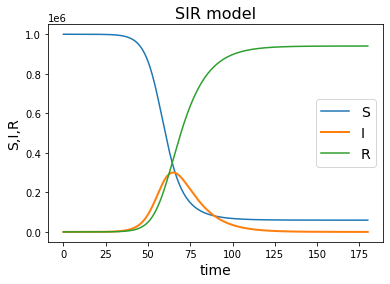

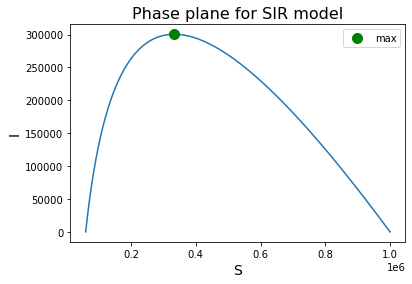

maximum value is [300463.6740973]
value of S when I is maximum is [332721.02710906]


In [5]:
# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

#functions that find maximum value of I and corresponding S
max_value = np.max(I)
index_of_maximum = np.where(I == max_value)
max_x=S[index_of_maximum]
plt.plot(max_x, max_value, 'go', markersize = 10, label="max")
plt.legend()
plt.show()

print("maximum value is", I[index_of_maximum])
print("value of S when I is maximum is", max_x)




We can observe that the number of infectious people reaches maximum at I=[300463.6740973] and S=[332721.02710906]

---

## Part B. Prior immunity (8 marks)

One can study the basic effect of immunity with the SIR model by starting from an initial condition in which a percentage of the population is in the $R$ class already. Think of these as individuals who have been removed from $S$ and put into $R$, either because they have prior natural immunity or because they have been vaccinated. Either way, they are immune and hence not susceptible at the start of the disease outbreak. 

**Assignment:** Illustrate how prior immunity flattens the curve by solving the ODE for a case with prior immunity and comparing with the baseline case.

Details: 
- The parameter values and total population size are as for the baseline case. The initial value $R(0)$ is your choice. $I(0) = 5$ as before. $S(0)$ is whatever it needs to be so that $N=10^6$. You should run some cases with different $R(0)$ and decide a value you like. Values in the range of 10% to 25% of the total population $N$ are good. You can try $R(0)$ greater than 25% of $N$, but for the report do not exceed 25%. 

- Produce two plots: a time series and a phase portrait. In each you want to show the baseline case and the prior immunity case. Hence six curves in the time series and two curves in the phase portrait. For the time series in particular you may need to vary line types to make things clear. Use legends. 

- On the phase portrait, indicate the points on each trajectory where $I$ reaches its maximum. Print these maximum values for each to quantify how much the curve is flattened.

- Optional (but recommended): Produce a third plot showing the time series for $I(t)$ with and without prior immunity. By excluding $S(t)$ and $R(t)$, the comparison between the two infection curves is clearer. Hopefully you have flattened the curve.

Hint: you obviously will copy-paste code from Part A. You should use new variables for the prior-immunity case such that the baseline solution computed in Part A is not somehow overwritten. Then all you need to do is solve the ODE for the new initial conditions and produce nice comparison plots. 

In [6]:
# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# initial conditions for prior immunity case
S1 = 10.0**6 - 200005
I1 = 5
R1 = 200000
y1 = np.array([S1, I1, R1])

In [7]:
#  Call the ODE solver and extract solutions #
y_sol1 = odeint(SIR, y1, t)

# extract S, I, R from the solution array y
S_1 = y_sol1[:,0]
I_1 = y_sol1[:,1]
R_1 = y_sol1[:,2]

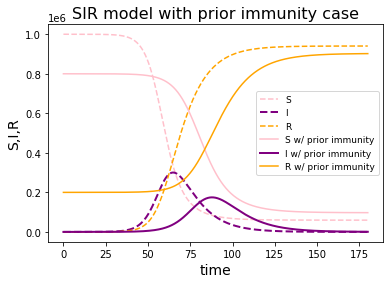

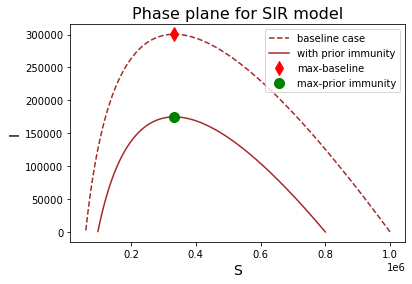

maximum value of I in the baseline case is [300463.6740973]
value of S when I is maximum is [332721.02710906]
 
maximum value of I in the case with prior immunity is [174845.59005028]
value of S when I is maximum is [332927.12990883]
 
curve has flattened by [125618.08404702] cases


In [8]:
#plotting
plt.plot(t, S, label="S", color = 'pink', linestyle='--')
plt.plot(t, I, lw = 2, label="I", color= 'purple', linestyle='--')
plt.plot(t, R, label="R", color = 'orange', linestyle='--' )

plt.plot(t, S_1, label="S w/ prior immunity", color = 'pink')
plt.plot(t, I_1, lw = 2, label="I w/ prior immunity", color = 'purple')
plt.plot(t, R_1, label="R w/ prior immunity", color = 'orange')

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model with prior immunity case", fontsize=16)
plt.legend(fontsize=9)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I, 'brown', linestyle='--', label="baseline case")
plt.plot(S_1, I_1, 'brown', label="with prior immunity")

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.legend(fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

max_value = np.max(I)
index_of_maximum = np.where(I == max_value)
max_x=S[index_of_maximum]
plt.plot(max_x, max_value, 'rd', markersize = 10, label="max-baseline")
plt.legend()

#functions that find maximum value of I and corresponding S
max_value1 = np.max(I_1)
index_of_maximum1 = np.where(I_1 == max_value1)
max_x1=S_1[index_of_maximum1]
plt.plot(max_x1, max_value1, 'go', markersize = 10, label="max-prior immunity")
plt.legend()
plt.show()

print("maximum value of I in the baseline case is", I[index_of_maximum])
print("value of S when I is maximum is", max_x)
print(" ")
print("maximum value of I in the case with prior immunity is", I_1[index_of_maximum1])
print("value of S when I is maximum is", max_x1)
print(" ")
print("curve has flattened by" , I[index_of_maximum]-I_1[index_of_maximum1], "cases")

First plot presents the SIR for baseline case (dashed line) and for the prior immunity case. We can observe that in the prior immunity case the curve I is flattened. 
Second plot presents the (S,I) phase portrait. Again, the number of infectious people (I) is less in the prior immunity case.

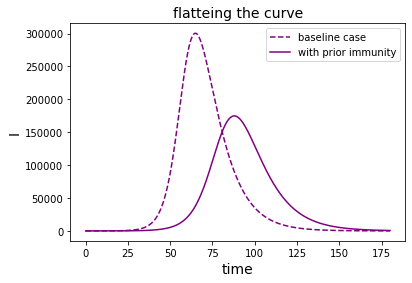

In [9]:
#optional part
plt.plot(t, I, color='purple',linestyle='--', label='baseline case')
plt.plot(t, I_1, color='purple', label='with prior immunity')
plt.title("flatteing the curve", fontsize=14)
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.legend()
plt.show()

We can observe that the curve has flattened by almost a half.

---

## Part C. Social distancing (10 marks)

One can model [social distancing](https://en.wikipedia.org/wiki/Social_distancing), or a mask mandate, by varying the parameter $\beta$ that controls the rate of infection. We will use the following simple approximation. When a mask mandate is in effect, the parameter $\beta$ will be reduced to 0.24, otherwise it will be 0.3, as in the baseline case. More specifically, we will consider $\beta$ to change between these two values according to:

$$
\beta = 0.3 \quad {\rm if} \quad t \le t_{m} \\
\beta = 0.24 \quad {\rm if} \quad t_{m} < t \le t_{m}+30 \\
\beta = 0.3 \quad {\rm if} \quad t_{m}+30 < t 
$$

$t_m$ corresponds to the time the mask mandate goes into effect. We consider a 30-day mandate period and so $t_m+30$ corresponds to the time the mask mandate is lifted. 

In principle one need not restrict to such specific circumstances, but this will simplify things. Note, that with $\beta$ varying with time, the ODE is no longer autonomous.

**Assignment:** Write a Python function to compute the right-hand-side of the SIR model with time-dependent $\beta$ given by the above expression. Solve the ODE for different values of $t_m$ and find a value of $t_m$ that gives the smallest value for maximum value of $I$, i.e., find $t_m$ that most flattens the curve. Plot this solution and compare with the baseline case.

Details: 

- As for the baseline case, use $\gamma = 0.1$ and the initial condition:
$S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$.

- You do not need to write Python code to search over different values of $t_m$. Use trial and error. Also, you do not need to find the exact best value of $t_m$ but find a value that is within $\pm 5$ days of the best choice. You do not need to show how you determined $t_m$. One you have decided $t_m$, set that value in your function. 

- Produce two plots: a time series and a phase portrait. In each you want to show the baseline case and the mask-mandate case. Hence six curves in the time series and two curves in the phase portrait. For the time series in particular you may need to vary line types to make things clear. Use legends. 

- On the phase portrait, indicate the points on each trajectory where $I$ reaches its maximum. Print these maximum values for each to quantify how much the curve is flattened.

- Optional (but recommended): Produce a third plot showing the time series for $I(t)$ with and without the mask mandate. The comparison between the two infection curves is clearer. Hopefully you have flattened the curve.

Note, if you have more experience with programming, you may use some more sophisticated methods to programme the time dependence of $\beta$ in your right-hand-side function.

In [10]:
# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# initial conditions to mas-mandate case
S2 = 10.0**6 - 5
I2 = 5
R2 = 0
y2 = np.array([S0, I0, R0])

In [11]:
#define new RHS of the ODE system
def SIR2 (y,t):
    S, I, R = y
    t_m=43
    if (t<=t_m):
        beta = 0.3
    elif ((t_m<t)&(t<=t_m+30)):
        beta = 0.24
    else :
        beta = 0.3

    gamma = 0.1

    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    return Sdot, Idot, Rdot

In [12]:
#  Call the ODE solver and extract solutions #
y_sol = odeint(SIR2, y0, t)

# extract S, I, R from the solution array y
S_2 = y_sol[:,0]
I_2 = y_sol[:,1]
R_2 = y_sol[:,2]

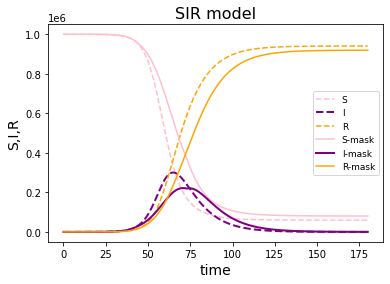

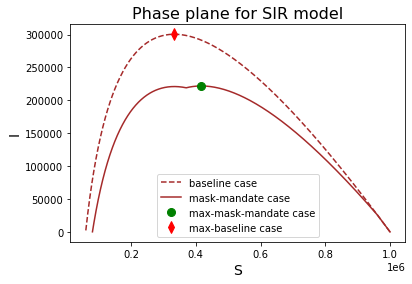

max value of I in the baseline case is 300463.6740973029
value of S when I is maximum is [332721.02710906]
 
max value of I in the mask-mandate case is 221850.67776266113
value of S when I is maximum is [416101.56122502]
 
curve has flattened by [227595.19776573] cases


In [13]:
#plotting
plt.plot(t, S, label="S", color = 'pink', linestyle='--')
plt.plot(t, I, lw = 2, label="I", color= 'purple', linestyle='--')
plt.plot(t, R, label="R", color = 'orange', linestyle='--' )

plt.plot(t, S_2, label="S-mask", color = 'pink')
plt.plot(t, I_2, lw = 2, label="I-mask", color = 'purple')
plt.plot(t, R_2, label="R-mask", color = 'orange')

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=9)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I, 'brown', linestyle='--', label="baseline case")
plt.plot(S_2, I_2, 'brown', label="mask-mandate case")

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

#functions that find maximum value of I and corresponding S
max_value2 = np.max(I_2)
index_of_maximum2 = np.where(I_2 == max_value2)
max_x2=S_2[index_of_maximum2]
plt.plot(max_x2, max_value2, 'go', markersize = 8, label="max-mask-mandate case")
plt.plot(max_x, max_value, 'rd', markersize = 8, label="max-baseline case")
plt.legend()
plt.show()

print("max value of I in the baseline case is", np.max(I))
print("value of S when I is maximum is", max_x)
print(" ")
print("max value of I in the mask-mandate case is", np.max(I_2))
print("value of S when I is maximum is", max_x2)
print(" ")
print("curve has flattened by" , I[index_of_maximum]-I_1[index_of_maximum2], "cases")

First plot presents the SIR for baseline case (dashed line) and for the mask-mandate case. We can observe that in the mask-mandate case the curve I is flattened. 
Second plot presents the (S,I) phase portrait. Again, the number of infectious people (I) is less in the mask-mandate case.

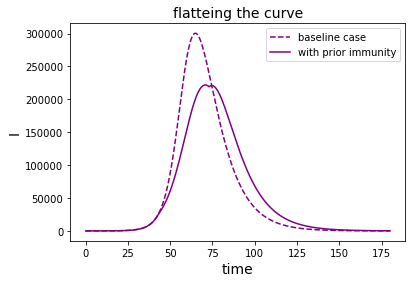

In [14]:
#optional part
plt.plot(t, I, color='purple',linestyle='--', label='baseline case')
plt.plot(t, I_2, color='purple', label='with prior immunity')
plt.title("flatteing the curve", fontsize=14)
plt.xlabel("time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.legend()
plt.show()

We can observe that curve has flattened a little bit.

---

## Further 3 marks

A further 3 marks will be awarded for each assignment based on overall quality and clarity of the submitted notebook. 
